In [1]:
%matplotlib inline
import string
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
ACCEPT_LETTERS = string.ascii_lowercase + ' '
FILE = './brazilian_tales_2017_1/LIFE_by_JM_Machado_de_Assis.txt'

# Questão 1

## a) Calculate and plot the probability distribution $P(x)$ over the 27 letters $x$.


In [3]:
def distribuicao_probabilistica(file):
    count = {}

    for line in np.loadtxt(file, dtype=bytes, delimiter='\n').astype(str):
        for letter in line:
            letter = letter.lower()

            if letter not in count:
                count[letter] = 0

            count[letter] += 1
        
    count_ascii = {k: count[k] for k in count if k in ACCEPT_LETTERS}
    count_ascii

    series = pd.Series(count_ascii)
    return series / series.sum()

item_a = distribuicao_probabilistica(FILE)

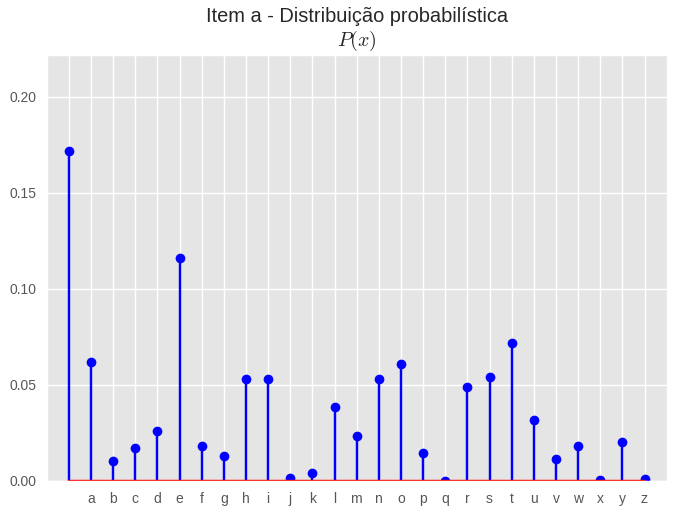

In [14]:
labels = item_a.keys()
y = item_a.values

x = range(len(y))
plt.stem(x, y)
plt.xticks(x, labels)
plt.axis([-1, len(item_a), 0, item_a.max() + 0.05])
plt.title('Item a - Distribuição probabilística\n$P(x)$')
plt.show()

## b) Calculate and plot the probability distribution $P(x, y)$ over the $27 x 27$ possible (ordered) bi-grams $xy$. Note: For this joint distribution, its two marginals $P(x)$ and $P(y)$ are identical.

In [5]:
def distribuicao_probabilistica_digrafo(file):
    count = {}

    text = ''
    for line in np.loadtxt(file, dtype=bytes, delimiter='\n').astype(str):
        text += line
    
    for x, y in zip(text[0:-1], text[1:]):
        x, y = x.lower(), y.lower()
        if x.lower() not in ACCEPT_LETTERS \
        or y.lower() not in ACCEPT_LETTERS:
            continue
        
        if (x, y) not in count:
            count[(x, y)] = 0
        
        count[(x, y)] += 1

    series = pd.Series(count)
    return series / series.sum()

count = distribuicao_probabilistica_digrafo('./brazilian_tales_2017_1/LIFE_by_JM_Machado_de_Assis.txt')

In [19]:
item_b = pd.DataFrame([], index=ACCEPT_LETTERS.__iter__(), columns=ACCEPT_LETTERS.__iter__())

for x, y in count.keys():
    item_b[x][y] = count[x][y]

item_b = item_b.fillna(0)
item_b.head()

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,
a,0.000000,0.000289,0.002168,0.001373,0.007732,0.000795,0.000867,0.012285,0.000506,0.000000,...,0.002674,0.002168,0.001229,0.000289,0.000289,0.002385,0.000000,0.000072,0.000000,0.016549
b,0.001229,0.000000,0.000000,0.000145,0.000289,0.000000,0.000000,0.000000,0.000145,0.000000,...,0.000072,0.000072,0.000072,0.000145,0.000000,0.000000,0.000000,0.000072,0.000000,0.007732
c,0.001518,0.000000,0.000000,0.000000,0.002746,0.000072,0.000000,0.000072,0.002240,0.000000,...,0.000578,0.000723,0.000217,0.000650,0.000000,0.000000,0.000145,0.000000,0.000000,0.006576
d,0.001373,0.000000,0.000000,0.000145,0.005709,0.000000,0.000000,0.000000,0.001012,0.000000,...,0.000650,0.000000,0.000145,0.000361,0.000000,0.000000,0.000000,0.000000,0.000000,0.006721
e,0.000217,0.004842,0.003541,0.004408,0.002457,0.002963,0.001445,0.026955,0.003252,0.000578,...,0.011346,0.005998,0.005926,0.000650,0.009828,0.001951,0.000000,0.001662,0.000795,0.005564


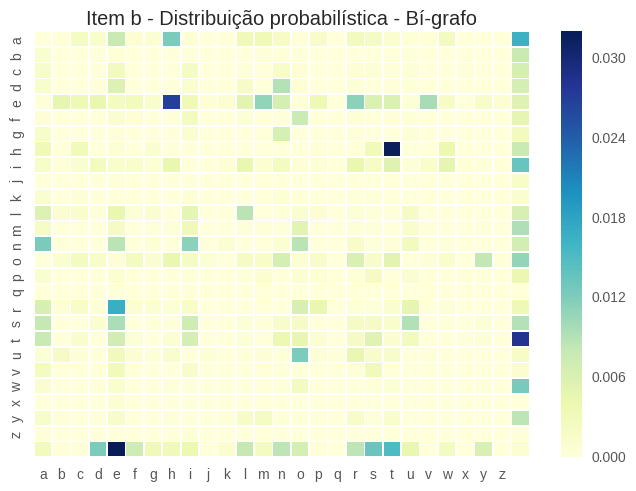

In [15]:
ax = plt.axes()
ax.set_title('Item b - Distribuição probabilística - Bí-grafo')
sns.heatmap(item_b, linewidths=.5, cmap="YlGnBu")

## c) From this joint distribution, calculate and plot the conditional distribution: 

In [20]:
def ProbabilityCalculator(sample_space, *args, **kwargs):

    class P(object):
        
        def __init__(self, *args, **kwargs):
            self.value = ProbabilityCalculator(sample_space, *args, **kwargs)
        
        def __truediv__(self, other):
            return self.value / other.value

    if not args:
        return 0
    
    elif isinstance(args[0], Conditional):
        S = sample_space
        conditional = args[0]
        
        x = conditional.x
        y = conditional.y
    
        return P(x, y) / P(y)

    # Marginal
    elif len(args) == 1:
        x = args[0].key
        return sample_space[x].sum()
    
    # Conjunta
    else:
        x = args[0].key
        y = args[1].key
        
        return sample_space[x][y]    

    raise Exception('Não tratei isso ainda')

class Probability(object):

    @staticmethod
    def for_sample_space(sample_space):
        """
        :param sample_space bidimentional dataframe
        """
        return lambda *args, **kwargs: ProbabilityCalculator(sample_space, *args, **kwargs)

class Conditional(object):
    def __init__(self, x, given_y):
        self.x = x
        self.y = given_y

    def __repr__(self):
        return "'{}' given '{}'".format(self.x, self.y)
    
class Event(object):
    
    def __init__(self, key):
        self.key = key
    
    def __or__(self, other):
        return Conditional(self, other)

P = Probability.for_sample_space(item_b)
'''
def P(X, Y):
    print(item_b)
'''
#P(X=x | Y=y) = P(X=x, Y=y)/P(Y=y)


a = Event('a')
b = Event('b')

print('P() =', P())
print('P(a) =', P(a))
print('P(a, b) =', P(a, b))
print('P(a | b) =', P(a | b))

P() = 0
P(a) = 0.06503830033241798
P(a, b) = 0.0012285012285
P(a | b) = 0.114093959732


---------------------------------------

In [9]:
item_c = {}
item_c['x|y'] = pd.DataFrame([], index=ACCEPT_LETTERS.__iter__(), columns=ACCEPT_LETTERS.__iter__())
item_c['y|x'] = pd.DataFrame([], index=ACCEPT_LETTERS.__iter__(), columns=ACCEPT_LETTERS.__iter__())

P = Probability.for_sample_space(item_b)

for x, y in count.keys():
    x, y = Event(x), Event(y)
    
    item_c['x|y'][x.key][y.key] = P(x|y)
    item_c['y|x'][x.key][y.key] = P(y|x)

item_c['x|y'] = item_c['x|y'].fillna(0)
item_c['y|x'] = item_c['y|x'].fillna(0)

### $i)$ $P(y|x)$, he conditional distribution of the second letter $y$, given the fist letter $x$;_

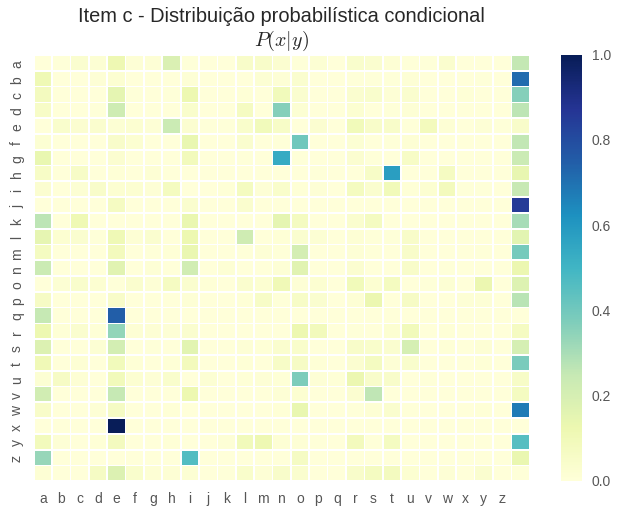

In [10]:
ax = plt.axes()
ax.set_title('Item c - Distribuição probabilística condicional\n$P(x|y)$')
sns.heatmap(item_c['x|y'], linewidths=.5, cmap="YlGnBu")

### $ii)$ $P(y|x)$, the conditional distribution of the first letter $x$, given the second letter $y$.

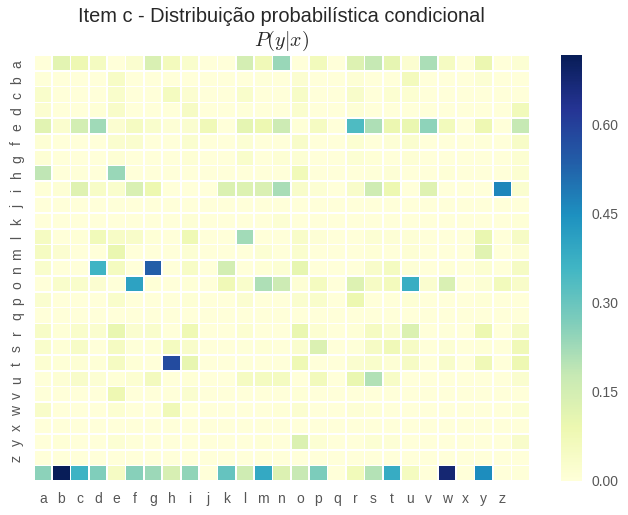

In [11]:
ax = plt.axes()
ax.set_title('Item c - Distribuição probabilística condicional\n$P(y|x)$')
sns.heatmap(item_c['y|x'], linewidths=.5, cmap="YlGnBu")